In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Ridge Regression scratch

In [2]:
class Ridge_R():
      
    def __init__(self, λ=1e-1):
        self.λ = λ # Ridge regression parameter
          
    def fit(self, X, y):
        self.m, self.n = X.shape
        z1 = (X.T @ X + self.λ * np.eye(self.n))
        z2 = X.T @ y
        self.W = np.linalg.inv(z1) @ z2

    def predict(self, X):    
        return X.dot(self.W)

## Loading boston dataset

Boston housing dataset (train and test files) is taken from sklearn's `load_boston` module

`Note:` You can add any dataset of the form X,y where

**X** must be of the form (samples, features)

In [3]:
X, y = load_boston(return_X_y=True)

## Normalization of the data

In [4]:
#row_sums = X.sum(axis=1)
#X = X / row_sums[:, np.newaxis]

## Train-Validation-Test split


In [5]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.2, random_state=42)

### Adding columns of ones to dataset to incorporate bias term

In [6]:
X_train = np.c_[np.ones(X_train.shape), X_train]
X_train1 = np.c_[np.ones(X_train1.shape), X_train1]
X_val = np.c_[np.ones(X_val.shape), X_val]
X_test = np.c_[np.ones(X_test.shape), X_test]

## Training and hyper-parameter tuning using validation set

Best Ridge regression hyperparameter λ value = 0.5 (lowest MSE)



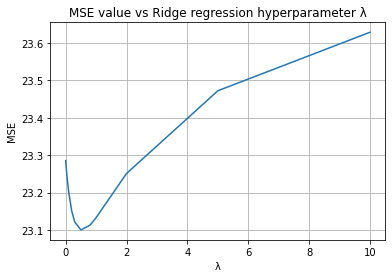

In [7]:
arr = [0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 2, 5, 10] 

mse = []
best = arr[0]
low_m = np.inf
for λ in arr:
    clf = Ridge_R(λ=λ)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    if m < low_m:
        best = λ
        low_m = m
    mse.append(m)

print('Best Ridge regression hyperparameter λ value =',best,'(lowest MSE)\n')

plt.plot(arr,mse)
plt.title('MSE value vs Ridge regression hyperparameter λ')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.savefig("MSE vs λ (without normalization) .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

## Train and predict on test set using best hyper-parameter

In [8]:
for λ in arr:
    clf = Ridge_R(λ=λ)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("λ value is ",λ)
    print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

λ value is  0.001
MSE Test dataset = 25.102212365627878
λ value is  0.005
MSE Test dataset = 25.10277807933155
λ value is  0.01
MSE Test dataset = 25.103541849472215
λ value is  0.02
MSE Test dataset = 25.105250491597744
λ value is  0.04
MSE Test dataset = 25.109338940560306
λ value is  0.05
MSE Test dataset = 25.11169042010527
λ value is  0.1
MSE Test dataset = 25.126027041736773
λ value is  0.2
MSE Test dataset = 25.16381021021449
λ value is  0.3
MSE Test dataset = 25.20829470703442
λ value is  0.5
MSE Test dataset = 25.303240200788025
λ value is  0.8
MSE Test dataset = 25.439496104718014
λ value is  1
MSE Test dataset = 25.521100151630474
λ value is  2
MSE Test dataset = 25.8261755797064
λ value is  5
MSE Test dataset = 26.25865575059442
λ value is  10
MSE Test dataset = 26.542136224269534


## We are comparing our model with the sklearn's prebuilt Ridge regression model

We find that the MSE value for the test dataset comes out to be exactly the same!

In [9]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

MSE Test dataset = 25.101806188425005


In [10]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor

## OTHER ML models

In [11]:
def print_estimator_name(estimator):
    print(estimator.__class__.__name__)

def evaluate(model, X_train, X_test, y_train, y_test):
    print_estimator_name(model)
    #Train Algorithm
    model.fit(X_train, y_train)
    # Make Predictions
    y_pred = model.predict(X_test)
    print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

In [12]:
models = [RandomForestRegressor(random_state=42),DecisionTreeRegressor(),SVR(gamma='auto'),KNeighborsRegressor(),LinearRegression(),Lasso(),ElasticNet()]

In [13]:
for model in models:
    evaluate(model,X_train, X_test, y_train, y_test)
    print()

RandomForestRegressor
MSE Test dataset = 12.019076843137254

DecisionTreeRegressor
MSE Test dataset = 28.75392156862745

SVR
MSE Test dataset = 70.78495549151694

KNeighborsRegressor
MSE Test dataset = 32.584886274509806

LinearRegression
MSE Test dataset = 25.102077370747917

Lasso
MSE Test dataset = 24.53873080268383

ElasticNet
MSE Test dataset = 23.94629771674362



## Print and compare top 10 predictions on test dataset

In [14]:
for i in range(10):
    print('predicted =',round(y_pred[i],2),'; Actual =',y_test[i])

predicted = 29.02 ; Actual = 23.6
predicted = 36.08 ; Actual = 32.4
predicted = 15.8 ; Actual = 13.6
predicted = 24.45 ; Actual = 22.8
predicted = 18.71 ; Actual = 16.1
predicted = 23.52 ; Actual = 20.0
predicted = 17.75 ; Actual = 17.8
predicted = 15.12 ; Actual = 14.0
predicted = 22.97 ; Actual = 19.6
predicted = 20.67 ; Actual = 16.8


## Cross-validation MSE using Train and Validation dataset

In [15]:
rs = [0,24,42,100,1]
cv_mse = []
for i in range(len(rs)):
    r = rs[i]
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.2, random_state=r)
    clf = Ridge_R(λ=0.001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)

In [16]:
print("Cross Validation MSE=",cv_mse)
print("mean Cross Validation MSE=",cv_mse.mean())
print("standard deviation of Cross Validation MSE=",cv_mse.std())

Cross Validation MSE= [21.26112946 20.9069267  23.28536341 23.41514829 25.69456617]
mean Cross Validation MSE= 22.91262680755653
standard deviation of Cross Validation MSE= 1.7251622228723038


Plotting other important comparisions

### Varying the size of test data set

In [40]:
arr_Testsize = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.65,0.7,0.75]
cv_mse = []
print("size of the Test data", "\t", "MSE")
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = Ridge_R(λ=0.001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    
    print(t,"\t","\t","\t",m)
    #print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)

size of the Test data 	 MSE
0.05 	 	 	 49.68909744744647
0.1 	 	 	 32.514800418612424
0.15 	 	 	 26.296271414422925
0.2 	 	 	 22.42898660742427
0.25 	 	 	 22.279826944956127
0.3 	 	 	 21.750785317127015
0.35 	 	 	 21.58424372724469
0.4 	 	 	 21.107608847514992
0.45 	 	 	 22.498201240674334
0.5 	 	 	 22.459176745573824
0.55 	 	 	 22.80607610432162
0.65 	 	 	 22.124161966150837
0.7 	 	 	 31.61024360012393
0.75 	 	 	 27.866213220411264


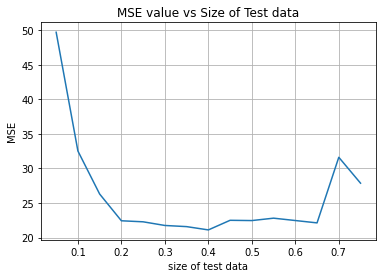

In [18]:
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### shuffling = True vs Shuffling = false

In [19]:
arr_Testsize = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.65,0.7,0.75]
cv_mse = []
for t in arr_Testsize:
    r = rs[i]
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= True)
    clf = Ridge_R(λ=0.001)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)

size of test data 0.05
MSE Test dataset = 15.538090381465944
size of test data 0.1
MSE Test dataset = 13.546976075551207
size of test data 0.15
MSE Test dataset = 27.855147010759886
size of test data 0.2
MSE Test dataset = 23.285363414698956
size of test data 0.25
MSE Test dataset = 22.36426404427338
size of test data 0.3
MSE Test dataset = 23.549313201056485
size of test data 0.35
MSE Test dataset = 23.245970989144485
size of test data 0.4
MSE Test dataset = 23.247237563160823
size of test data 0.45
MSE Test dataset = 22.917816385538373
size of test data 0.5
MSE Test dataset = 27.683424945703187
size of test data 0.55
MSE Test dataset = 33.15808561688367
size of test data 0.65
MSE Test dataset = 30.668986191365054
size of test data 0.7
MSE Test dataset = 30.309963189896933
size of test data 0.75
MSE Test dataset = 30.469689755002516


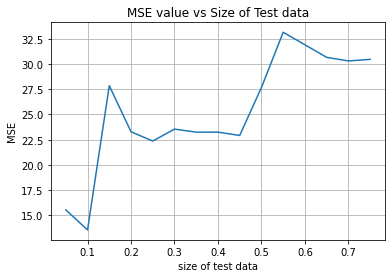

In [20]:
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [21]:
arr_Testsize = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.65,0.7,0.75]

In [22]:
def print_estimator_name(estimator):
    print(estimator.__class__.__name__)

def evaluate(model, X_train, X_test, y_train, y_test,t):
    print_estimator_name(model)
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= True)
    #Train Algorithm
    model.fit(X_train, y_train)
    # Make Predictions
    y_pred = model.predict(X_test)
    print('MSE Test dataset =',mean_squared_error(y_test, y_pred))

In [42]:
for t in arr_Testsize:
    print("size of test dataset=",t)
    print()
    for model in models:
        evaluate(model,X_train, X_test, y_train, y_test,t)
        print()
    

size of test dataset= 0.05

RandomForestRegressor
MSE Test dataset = 9.69398305882353

DecisionTreeRegressor
MSE Test dataset = 27.800392156862753

SVR
MSE Test dataset = 70.00306748145528

KNeighborsRegressor
MSE Test dataset = 26.06690588235294

LinearRegression
MSE Test dataset = 24.581271581947

Lasso
MSE Test dataset = 24.5242819646217

ElasticNet
MSE Test dataset = 24.135454425409016

size of test dataset= 0.1

RandomForestRegressor
MSE Test dataset = 11.890589215686271

DecisionTreeRegressor
MSE Test dataset = 29.878627450980385

SVR
MSE Test dataset = 70.33607264126985

KNeighborsRegressor
MSE Test dataset = 27.128568627450978

LinearRegression
MSE Test dataset = 24.268001837948113

Lasso
MSE Test dataset = 24.248412793154785

ElasticNet
MSE Test dataset = 23.87927054150992

size of test dataset= 0.15

RandomForestRegressor
MSE Test dataset = 12.619801960784311

DecisionTreeRegressor
MSE Test dataset = 30.25745098039216

SVR
MSE Test dataset = 70.45548927480675

KNeighborsRegre

### Random Forest regressor with varying test data size

size of test data 0.05
MSE Test dataset = 33.073226809523725
size of test data 0.1
MSE Test dataset = 23.007240609756064
size of test data 0.15
MSE Test dataset = 17.034535852458998
size of test data 0.2
MSE Test dataset = 13.100499567901208
size of test data 0.25
MSE Test dataset = 13.776636158415815
size of test data 0.3
MSE Test dataset = 12.585501270491804
size of test data 0.35
MSE Test dataset = 13.059572190140845
size of test data 0.4
MSE Test dataset = 14.070826209876543
size of test data 0.45
MSE Test dataset = 15.295277153846147
size of test data 0.5
MSE Test dataset = 14.378333425742573
size of test data 0.55
MSE Test dataset = 14.621995686098646
size of test data 0.65
MSE Test dataset = 17.531908212927757
size of test data 0.7
MSE Test dataset = 25.068274388692583
size of test data 0.75
MSE Test dataset = 21.247595270627045


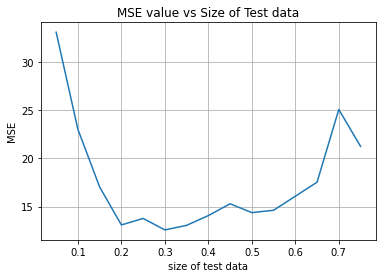

In [24]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = RandomForestRegressor(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Decision Tree Regressor 

size of test data 0.05
MSE Test dataset = 30.410476190476196
size of test data 0.1
MSE Test dataset = 27.81439024390244
size of test data 0.15
MSE Test dataset = 29.42983606557377
size of test data 0.2
MSE Test dataset = 20.873580246913583
size of test data 0.25
MSE Test dataset = 18.147326732673264
size of test data 0.3
MSE Test dataset = 23.580655737704912
size of test data 0.35
MSE Test dataset = 27.931267605633796
size of test data 0.4
MSE Test dataset = 20.490123456790126
size of test data 0.45
MSE Test dataset = 24.90714285714286
size of test data 0.5
MSE Test dataset = 22.893663366336632
size of test data 0.55
MSE Test dataset = 23.74695067264574
size of test data 0.65
MSE Test dataset = 34.761825095057034
size of test data 0.7
MSE Test dataset = 48.26088339222615
size of test data 0.75
MSE Test dataset = 37.61910891089109


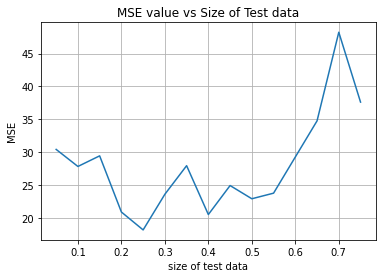

In [25]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

### Support Vector Regressor

size of test data 0.05
MSE Test dataset = 64.24217708217982
size of test data 0.1
MSE Test dataset = 71.07572409408868
size of test data 0.15
MSE Test dataset = 75.50521677965669
size of test data 0.2
MSE Test dataset = 67.30735631951231
size of test data 0.25
MSE Test dataset = 70.28142253165004
size of test data 0.3
MSE Test dataset = 65.50620326501004
size of test data 0.35
MSE Test dataset = 76.74302022689619
size of test data 0.4
MSE Test dataset = 82.35554001056218
size of test data 0.45
MSE Test dataset = 85.14940302977102
size of test data 0.5
MSE Test dataset = 88.55231177252776
size of test data 0.55
MSE Test dataset = 88.5311870172412
size of test data 0.65
MSE Test dataset = 85.24955429227633
size of test data 0.7
MSE Test dataset = 85.47213259841297
size of test data 0.75
MSE Test dataset = 96.14162787948005


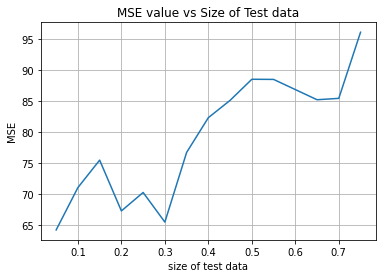

In [26]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = SVR(gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

size of test data 0.05
MSE Test dataset = 82.21611428571431
size of test data 0.1
MSE Test dataset = 51.5199512195122
size of test data 0.15
MSE Test dataset = 44.10171147540984
size of test data 0.2
MSE Test dataset = 38.43229629629629
size of test data 0.25
MSE Test dataset = 38.129861386138614
size of test data 0.3
MSE Test dataset = 36.97065573770491
size of test data 0.35
MSE Test dataset = 49.611008450704226
size of test data 0.4
MSE Test dataset = 45.477081481481484
size of test data 0.45
MSE Test dataset = 47.29022197802198
size of test data 0.5
MSE Test dataset = 45.76464356435644
size of test data 0.55
MSE Test dataset = 49.23117130044842
size of test data 0.65
MSE Test dataset = 49.63562281368821
size of test data 0.7
MSE Test dataset = 52.1598812720848
size of test data 0.75
MSE Test dataset = 59.90331221122113


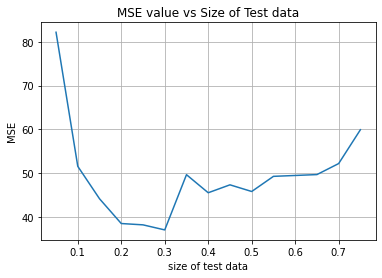

In [27]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = KNeighborsRegressor()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

size of test data 0.05
MSE Test dataset = 49.68722825174213
size of test data 0.1
MSE Test dataset = 32.51434498533773
size of test data 0.15
MSE Test dataset = 26.295723345886163
size of test data 0.2
MSE Test dataset = 22.42844326833245
size of test data 0.25
MSE Test dataset = 22.279312012976753
size of test data 0.3
MSE Test dataset = 21.750369643896832
size of test data 0.35
MSE Test dataset = 21.583319537613505
size of test data 0.4
MSE Test dataset = 21.106834353528676
size of test data 0.45
MSE Test dataset = 22.497080344972343
size of test data 0.5
MSE Test dataset = 22.457817508104768
size of test data 0.55
MSE Test dataset = 22.804983625531158
size of test data 0.65
MSE Test dataset = 22.125265918719624
size of test data 0.7
MSE Test dataset = 31.60998412850602
size of test data 0.75
MSE Test dataset = 27.86569005814228


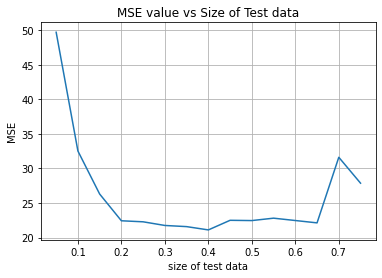

In [28]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

size of test data 0.05
MSE Test dataset = 49.68722825174213
size of test data 0.1
MSE Test dataset = 32.51434498533773
size of test data 0.15
MSE Test dataset = 26.295723345886163
size of test data 0.2
MSE Test dataset = 22.42844326833245
size of test data 0.25
MSE Test dataset = 22.279312012976753
size of test data 0.3
MSE Test dataset = 21.750369643896832
size of test data 0.35
MSE Test dataset = 21.583319537613505
size of test data 0.4
MSE Test dataset = 21.106834353528676
size of test data 0.45
MSE Test dataset = 22.497080344972343
size of test data 0.5
MSE Test dataset = 22.457817508104768
size of test data 0.55
MSE Test dataset = 22.804983625531158
size of test data 0.65
MSE Test dataset = 22.125265918719624
size of test data 0.7
MSE Test dataset = 31.60998412850602
size of test data 0.75
MSE Test dataset = 27.86569005814228


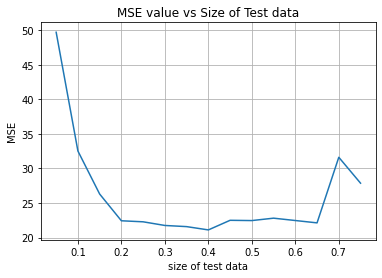

In [29]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

size of test data 0.05
MSE Test dataset = 59.9271501106284
size of test data 0.1
MSE Test dataset = 39.69797452440321
size of test data 0.15
MSE Test dataset = 33.433486715029346
size of test data 0.2
MSE Test dataset = 27.44690111421423
size of test data 0.25
MSE Test dataset = 26.768811322059115
size of test data 0.3
MSE Test dataset = 25.052545869875836
size of test data 0.35
MSE Test dataset = 27.52428146028874
size of test data 0.4
MSE Test dataset = 26.43686358874129
size of test data 0.45
MSE Test dataset = 28.64466134723721
size of test data 0.5
MSE Test dataset = 29.712319215832423
size of test data 0.55
MSE Test dataset = 29.769244471441354
size of test data 0.65
MSE Test dataset = 26.098631938391108
size of test data 0.7
MSE Test dataset = 27.43432806797379
size of test data 0.75
MSE Test dataset = 28.623275613715247


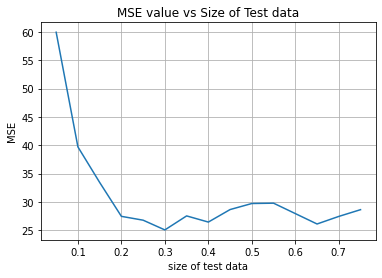

In [30]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = Lasso()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

size of test data 0.05
MSE Test dataset = 59.318476400813864
size of test data 0.1
MSE Test dataset = 39.85288804391512
size of test data 0.15
MSE Test dataset = 33.83777808265271
size of test data 0.2
MSE Test dataset = 27.89727794165876
size of test data 0.25
MSE Test dataset = 27.54908884627221
size of test data 0.3
MSE Test dataset = 25.76785758848745
size of test data 0.35
MSE Test dataset = 28.071313283260174
size of test data 0.4
MSE Test dataset = 27.0002607992406
size of test data 0.45
MSE Test dataset = 28.990545502884032
size of test data 0.5
MSE Test dataset = 29.56613640975354
size of test data 0.55
MSE Test dataset = 29.319993302202665
size of test data 0.65
MSE Test dataset = 26.249266433350797
size of test data 0.7
MSE Test dataset = 26.475514884313537
size of test data 0.75
MSE Test dataset = 29.981146204755426


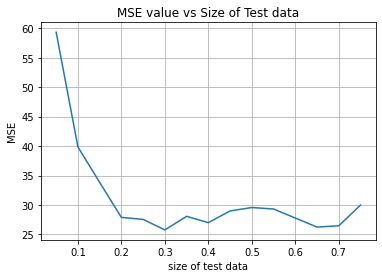

In [31]:
cv_mse = []
for t in arr_Testsize:
    cv = i+1
    X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = t, random_state=42,shuffle= False)
    clf = ElasticNet()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    m = mean_squared_error(y_val, y_pred)
    print("size of test data",t)
    print('MSE Test dataset =',m)
    cv_mse.append(m)
cv_mse = np.array(cv_mse)
plt.plot(arr_Testsize,cv_mse)
plt.title('MSE value vs Size of Test data')
plt.xlabel('size of test data')
plt.ylabel('MSE')
plt.savefig("MSE vs size of test data .png",dpi=300, bbox_inches='tight')
plt.grid()
plt.show()